#Assignment 3: Due date Wed, 12 Oct, Full Credit: 20 points#
##Individually Graded. Collaboration is encouraged but do not copy the code ##

# The purpose of this exercise is to implement the linear regression technique to two toy datasets and infer the performance of both the models.#

**Task: Fit the following toy data to a linear regression model with $\mathrm{R}^1  + $ a bias parameter. You MUST write your own LinearRegression method. To solve the optimization, you could use linalg.lstsq(x, y) (refer https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html for more details)**

In [161]:
from sklearn.model_selection import train_test_split
import numpy as np
N = 10
X = np.random.rand(N) * 10              #generate N random numbers from 0-20
Y =  4 + 4*X + 1*np.random.randn(N)     #generate y using a linear model and add some noise
print(X.shape, Y.shape) 




(10,) (10,)


In [163]:
# beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
from multiprocessing.dummy import Array
from statistics import mode


class LinearRegression:
    weights = []
    X_mat = []
    Y 
    def __init__(self, X, Y) -> None:
        self.X_mat = np.vstack((np.ones(len(X)), X)).T
        self.Y = Y


    def fit(self):
        self.weights =  np.linalg.inv(self.X_mat.T.dot(self.X_mat)).dot(self.X_mat.T).dot(self.Y)
        return self.weights



    def y_hat(self) -> Array:
        return  self.X_mat.dot(self.weights)
        


model = LinearRegression(X, Y)
model.fit()
y_hat = (model.y_hat())
print(model.weights)

[4.49109813 3.89121268]


**Task: Implement the cost function: mean(w[0] + w[1]*x - y)**2)** where w[0] and w[1] are the weights returned by your trained model. **

In [164]:
diff  = y_hat - Y
loss = 0

for i in diff:
    loss += (i*i)


mean_loss = loss/len(diff)

# print(mean_loss)
print(model.weights)



[4.49109813 3.89121268]


**Task: Display the graph of the loss function using the weights obtained from the model.**

**Answer**

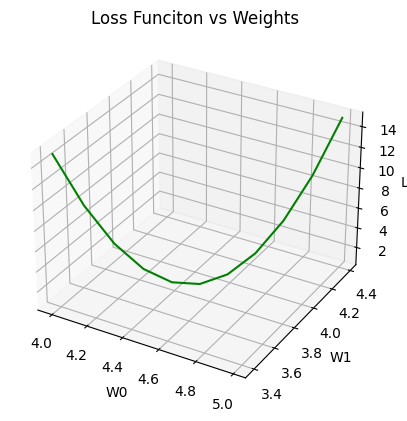

In [173]:
from collections import deque
import matplotlib.pyplot as plt
from numpy import arange


random_weights =  deque([model.weights])
for i in arange(0.1,0.6,0.1):
    w0 = model.weights[0]
    w1 = model.weights[1]
    random_weights.appendleft([w0-i, w1-i])
    random_weights.append([w0+i, w1+i])




losses = []
for i in random_weights:
    diff  = model.X_mat.dot(i) - Y
    sq = diff ** 2
    mse = ((diff)**2).mean(axis=0)
    losses.append(mse)




ax = plt.axes(projection ='3d')

ax.set_xlabel('W0')
ax.set_ylabel('W1')
ax.set_zlabel('Loss');
w0 = list(zip(*random_weights))[0]
w1 = list(zip(*random_weights))[1]

ax.plot3D(w0, w1, losses, 'green')
ax.set_title('Loss Funciton vs Weights')
plt.show()




**Task: Plot the predicted line/model**

**Task: Consider another toy dataset below. Use your same coe for linear regression to Fit to this new dataset. State your observations?**

**Answer**

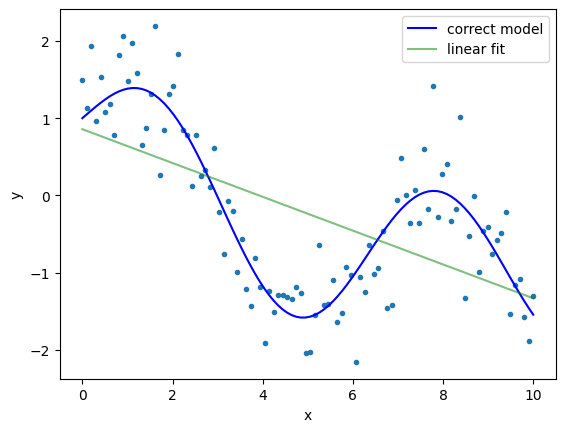

In [174]:
N = 100
x = np.linspace(0,10, N)
yt = np.sin(x) + np.cos(x**.5)                        
y = yt + .5*np.random.randn(N)                     #generate y using a non linear model and add noise
new_model = LinearRegression(x, y)
new_model.fit()
yh = new_model.y_hat()
plt.plot(x, y, '.')
plt.plot(x, yt, 'b-', label='correct model')
plt.plot(x, yh, 'g-', alpha=.5, label='linear fit')
plt.xlabel('x')
plt.ylabel(r'y')
plt.legend()
plt.show()
